In [1]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
log_columns = [
               'fV0cosPA', 
               'fCascCosPa',
               'fDcaV0Daughters', 
               'fDcaV0ToPv'
               ]

custom_ranges = {
    # 'fMassOmega': (1.5, 2.1),
    'fPt': (0, 6),
    'fBachPt': (0, 2.0),
    # 'fV0cosPA': (0.9, 1),
    # 'fMassXi': (1.3, 1.4),
    # 'fCascCosPa': (0.9, 1),
    # 'fDcaV0Daughters': (0.04, 0.1),
    # 'fDcaV0ToPv': (0.01, 0.07),
    # 'fBachPt': (-10, 10),
    # 'fTpcInnerParBach': (-10, 10),
    # 'fMLambda': (-10, 10),
    'fNSigmaTpcBachKa': (-10, 10),
    'fNSigmaTofBachKa': (-10, 10),
    'fOccupancyFt0c': (0, 15000),
    'fOccupancyIts': (0, 1000),
    # 'fCentralityFT0C': (0, 60),
    # 'fCentralityFT0M': (0, 60),
    # 'fCandFlag': (0, 1)
}

custom_bins = {
    'fMassOmega': 100,
    'fPt': 100,
    'fBachPt': 100,
    'fV0cosPA': 100,
    'fMassXi': 100,
    'fCascCosPa': 100,
    'fDcaV0Daughters': 100,
    'fDcaV0ToPv': 100,
    'fBachPt': 100,
    'fTpcInnerParBach': 100,
    'fMLambda': 100,
    'fNSigmaTpcBachKa': 100,
    'fNSigmaTofBachKa': 100,
    'fOccupancyFt0c': 100,
    'fOccupancyIts': 100,
    'fCentralityFT0C': 100,
    'fCentralityFT0M': 100,
    'fCandFlag': 100
}

n_columns = 17
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

# DATA 


In [3]:
df_data = pd.read_parquet("/data/shared/hf_pid_studies_pbpb/casc/Data/Train306756/LHC23zzh_pass4_small.parquet", engine="pyarrow") 

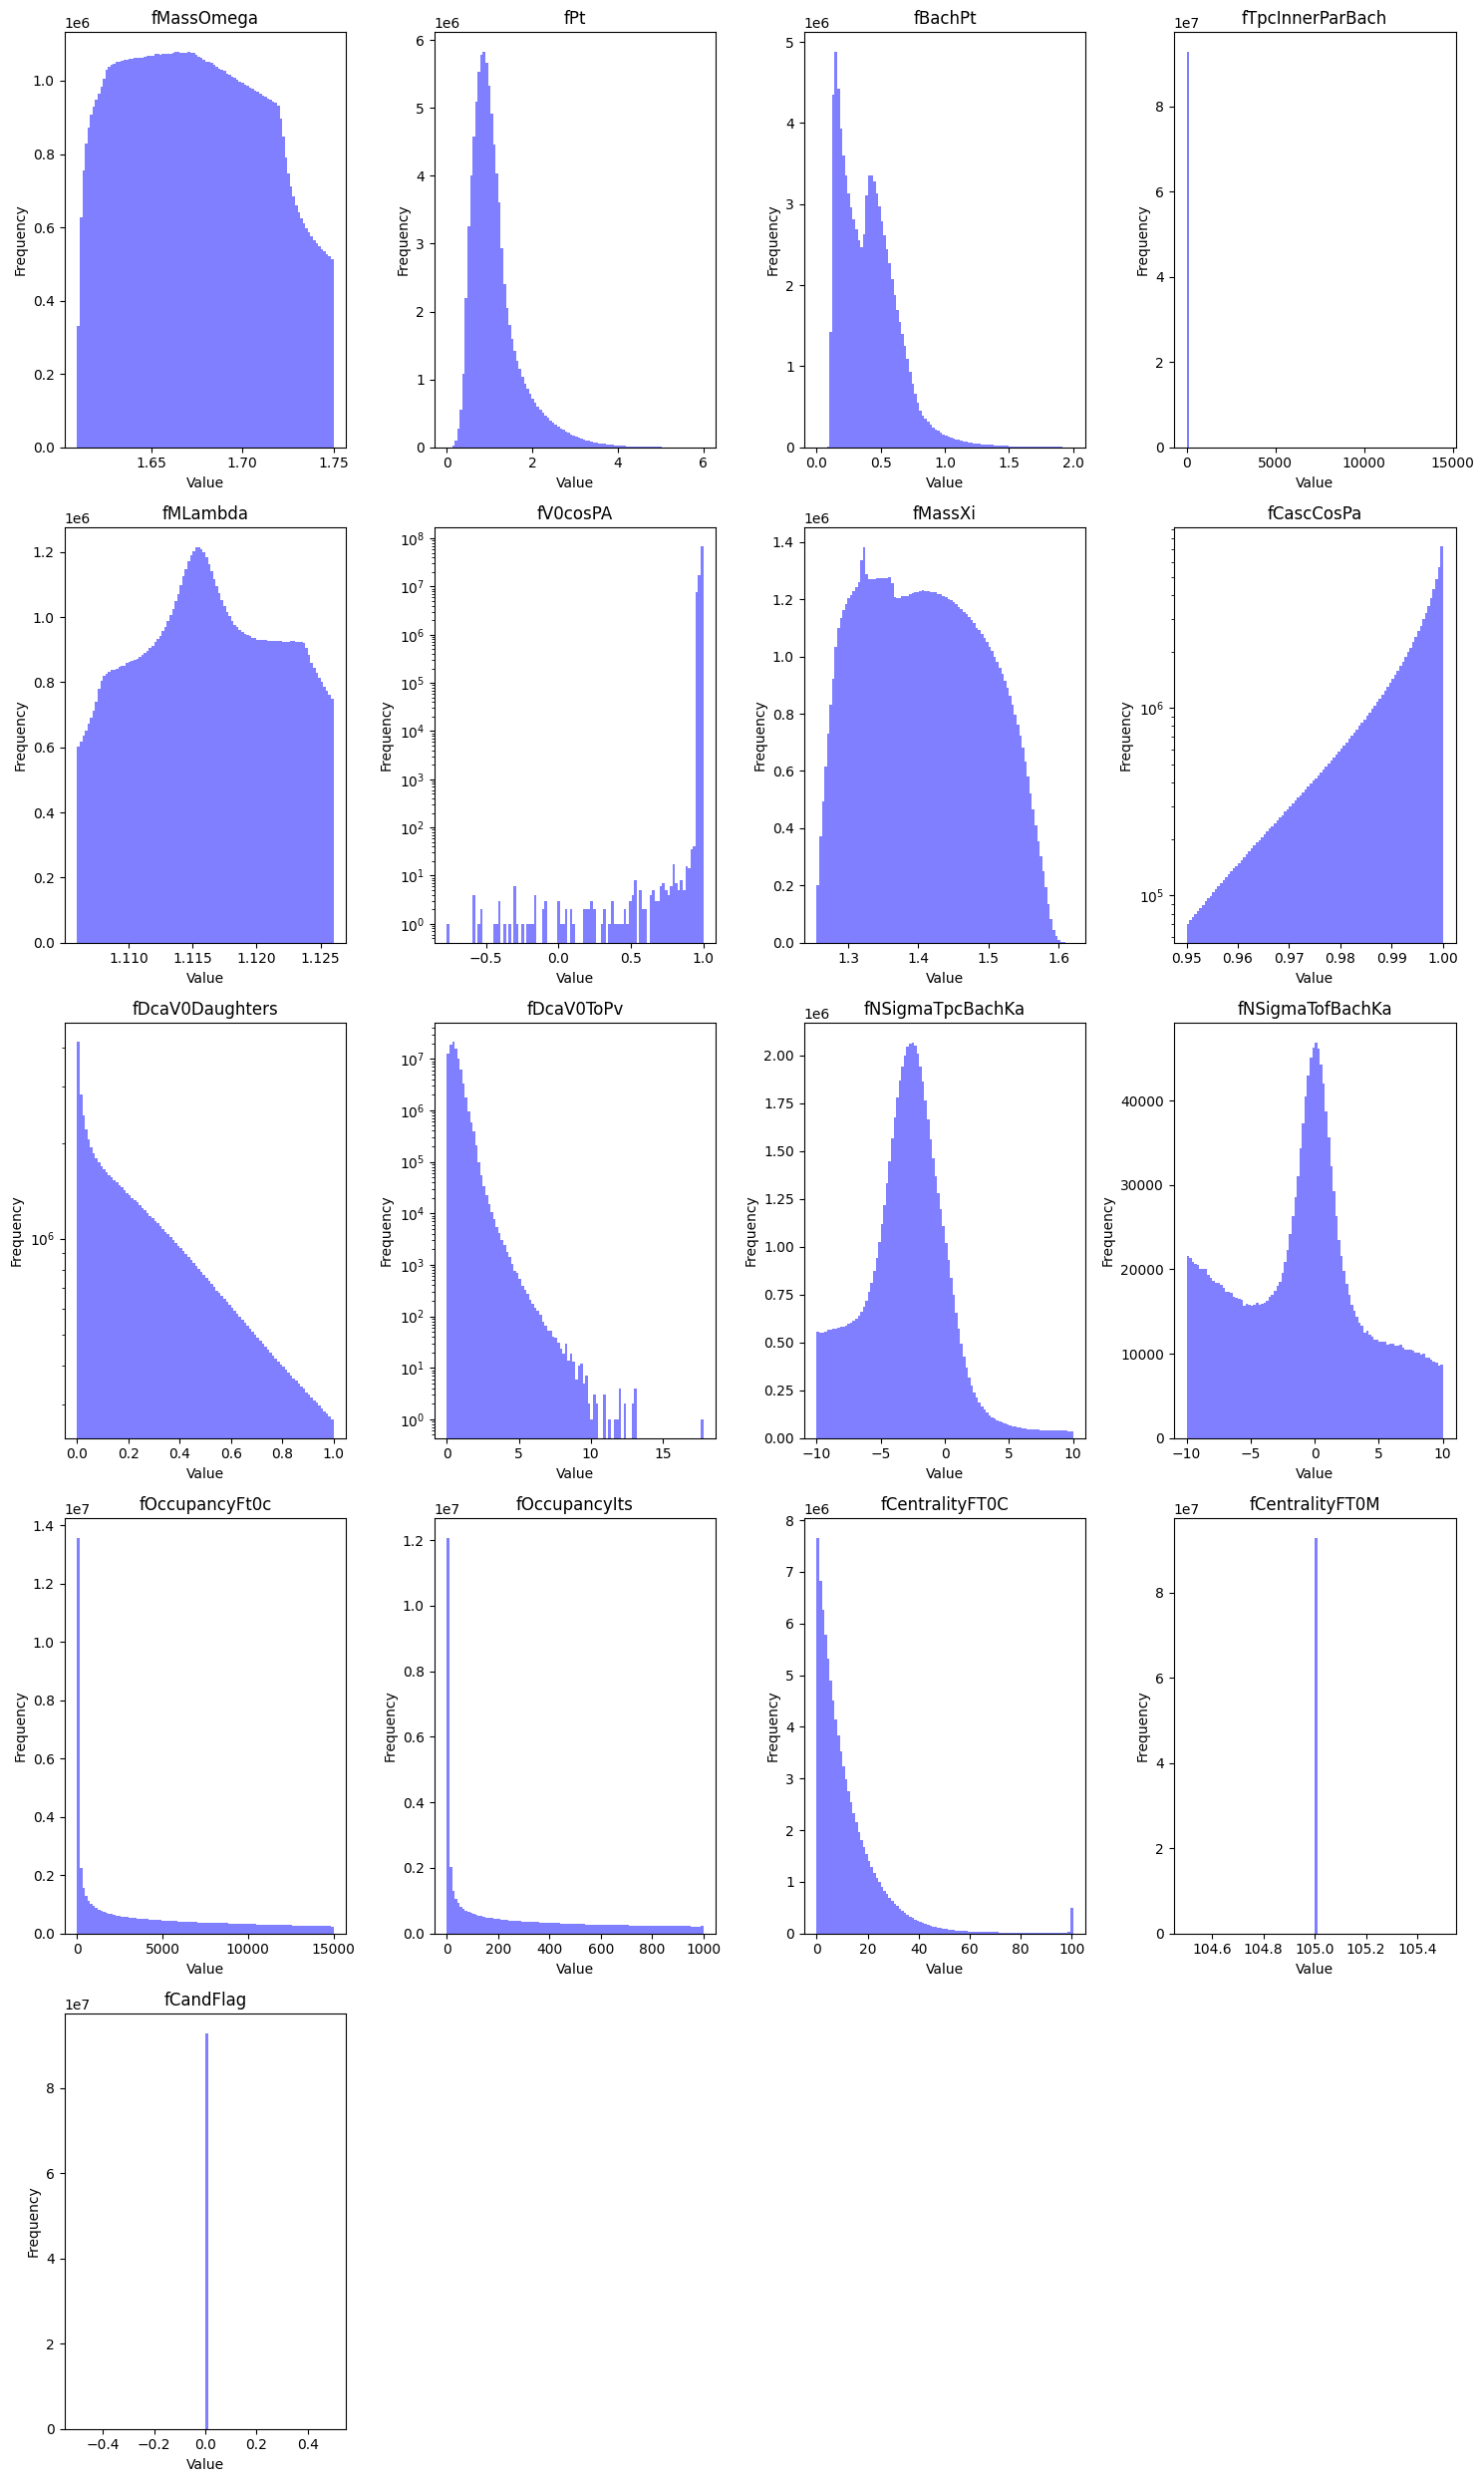

In [4]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [5]:
sel_df_data = df_data.query("(fMassOmega > 1.65 and fMassOmega < 1.70) and " 
                                                    "(fMassXi < 1.30 or fMassXi > 1.35) and "
                                                    "fCascCosPa > 0.99999 and fDcaV0Daughters < 0.01 and "
                                                    "fDcaV0ToPv > 0.02 and fDcaV0ToPv < 1") # and " 
                                                    # "fV0cosPA > 0.05")
print(f"[bef. sel.] Number of dataframe entries: {len(df_data)}")
print(f"[aft. sel.] Number of dataframe entries: {len(sel_df_data)}")
print(f"Dataframe columns: {sel_df_data.columns}")

[bef. sel.] Number of dataframe entries: 92811365
[aft. sel.] Number of dataframe entries: 4713
Dataframe columns: Index(['fMassOmega', 'fPt', 'fBachPt', 'fTpcInnerParBach', 'fMLambda',
       'fV0cosPA', 'fMassXi', 'fCascCosPa', 'fDcaV0Daughters', 'fDcaV0ToPv',
       'fNSigmaTpcBachKa', 'fNSigmaTofBachKa', 'fOccupancyFt0c',
       'fOccupancyIts', 'fCentralityFT0C', 'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


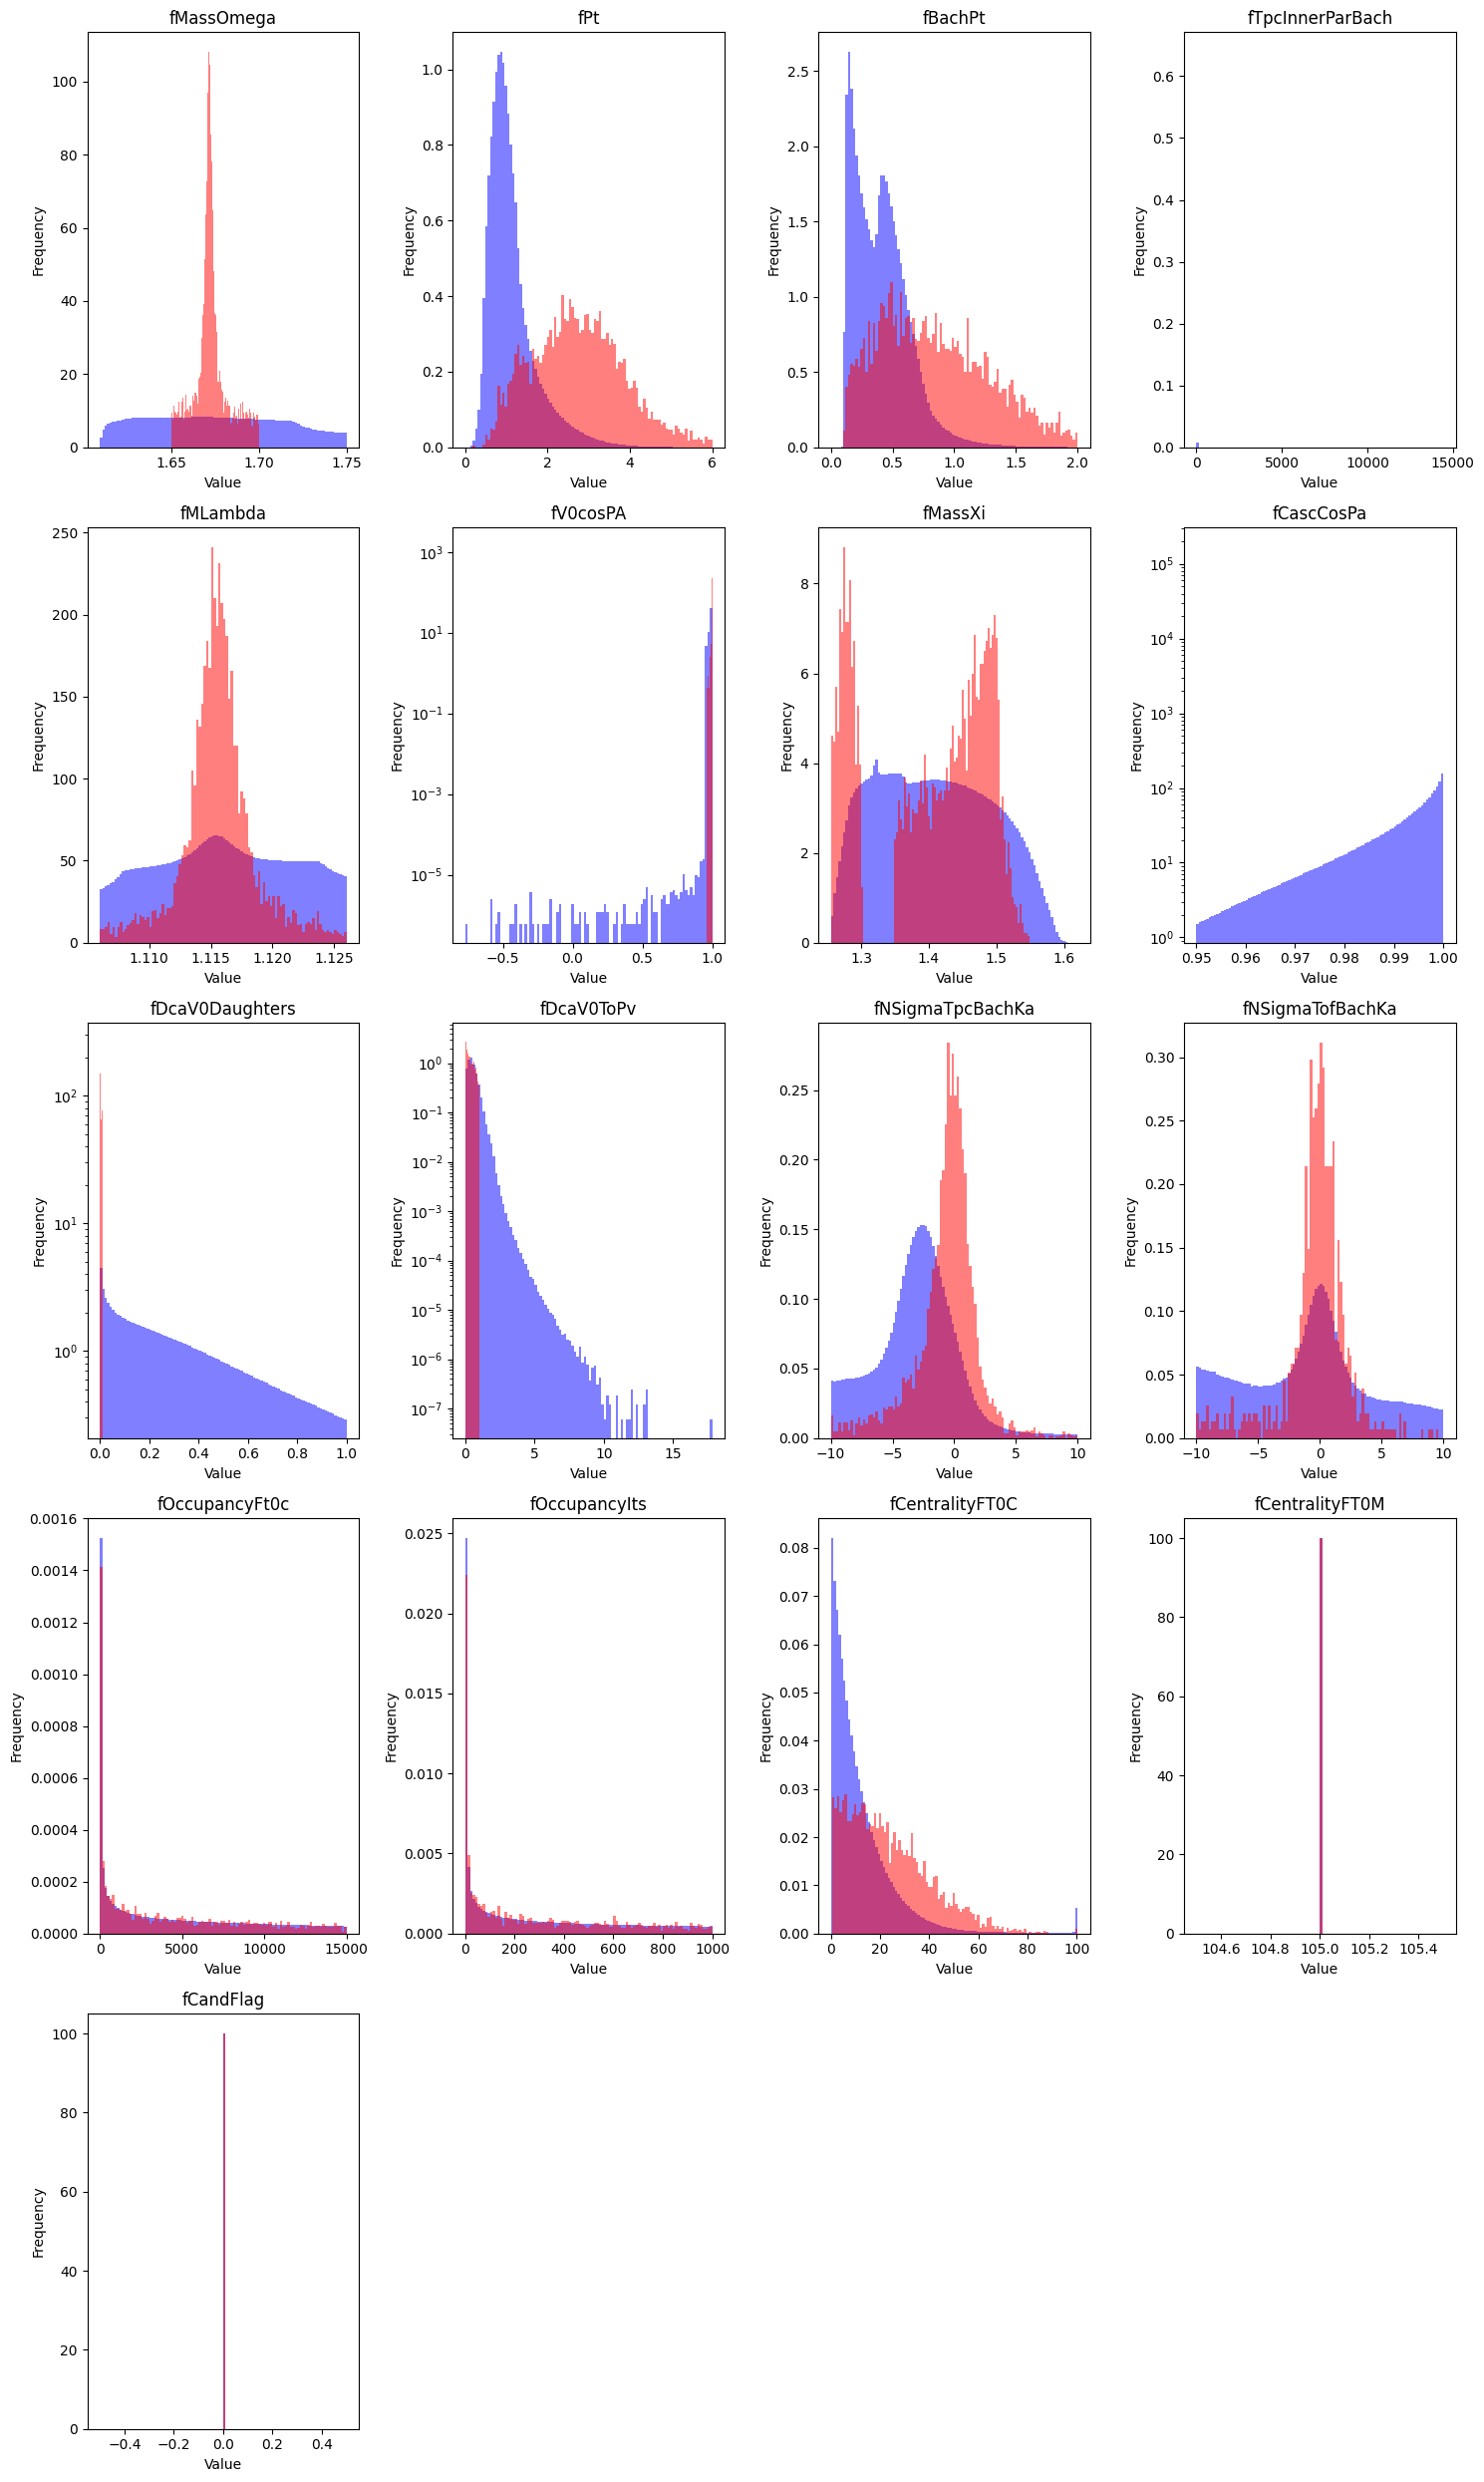

In [6]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", density=True, color='blue')
    axes[i].hist(sel_df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", density=True, color='red')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# MC

In [7]:
df_mc = pd.read_parquet("/data/shared/hf_pid_studies_pbpb/casc/MC/Train307614/LHC24g2_casc.parquet", engine="pyarrow")
print(f"MC-Matched cascades: {len(df_mc)}")

MC-Matched cascades: 51535


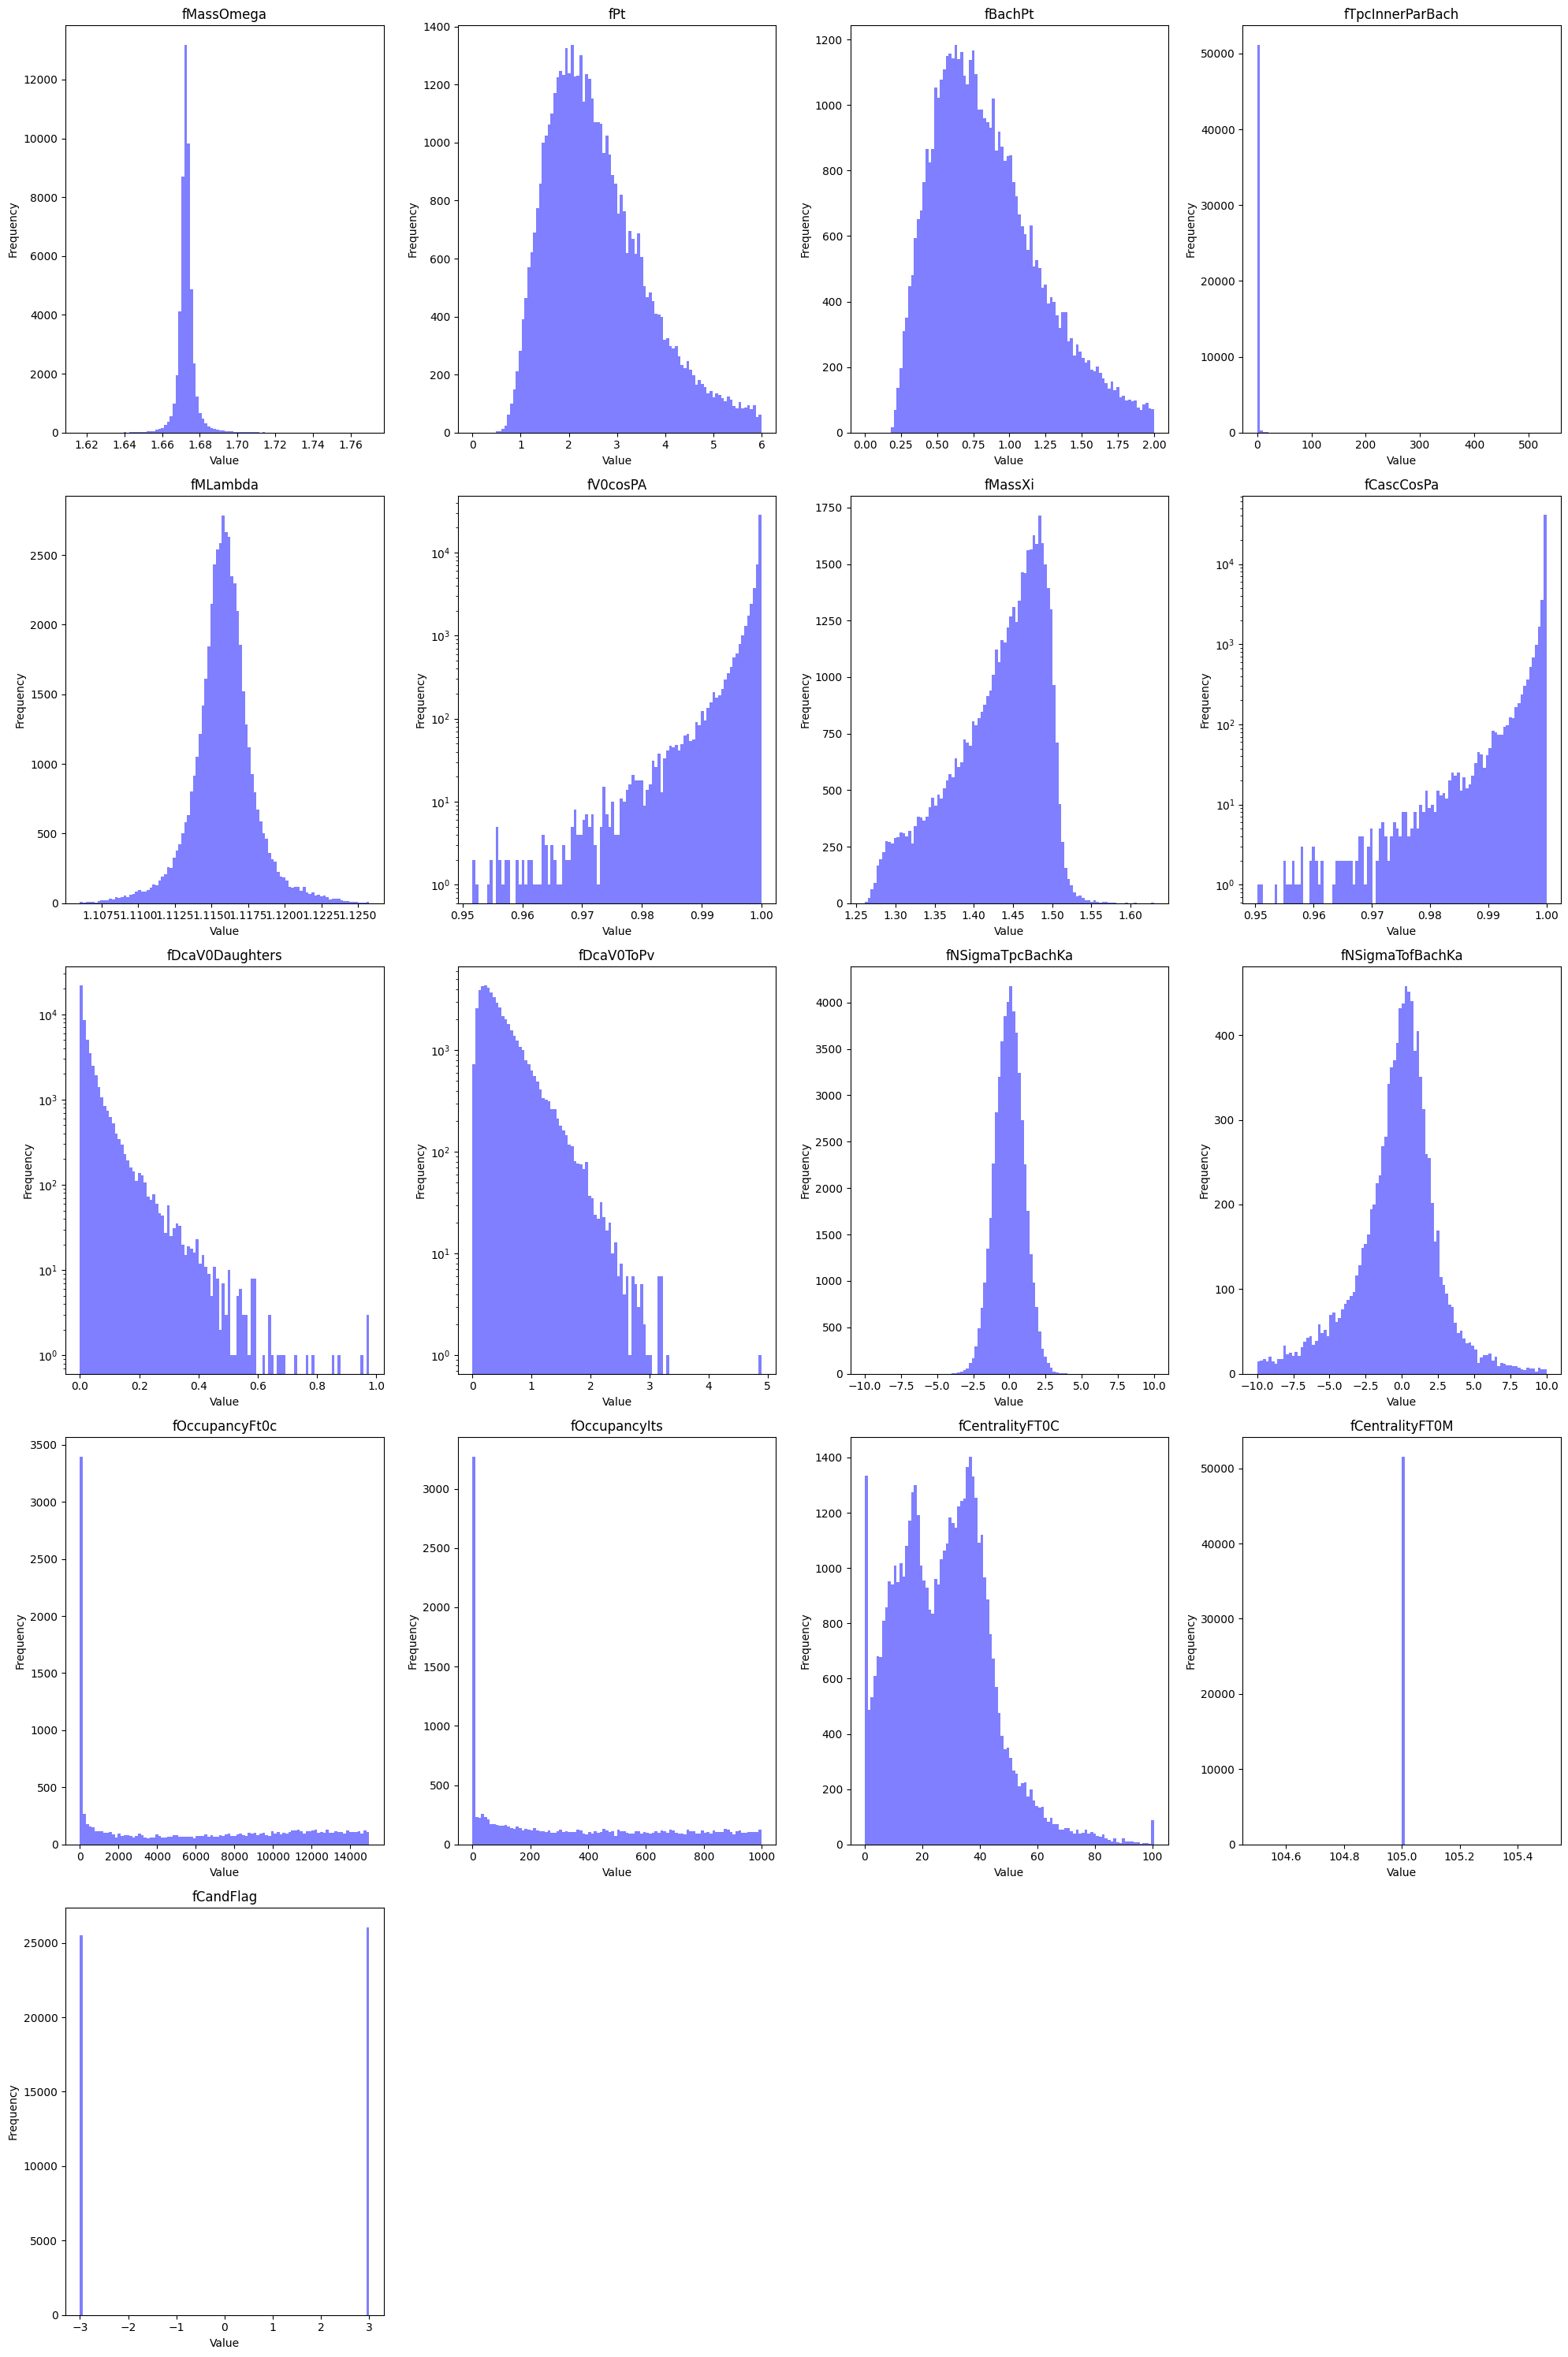

In [8]:
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * (n_rows + 1)))
axes = axes.flatten()
for i, column in enumerate(df_mc.columns):
    axes[i].hist(df_mc[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()